220.85

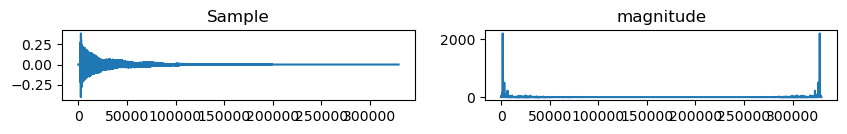

In [21]:
import librosa
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_file = 'sample2.wav'
audio, sample_rate = librosa.load(audio_file, sr=None)
#perfect_pitch = {"E2": 82.41, "A2":110.00, "D3": 146.83, "G3": 196.00, "B3": 246.94, "E4": 329.63 }
# sample_rate, audio = wavfile.read("Bass_Ab.wav")

# Apply Fourier Transform
fft = np.fft.fft(audio)
magnitude = np.abs(fft)
fig = plt.figure(figsize = (10, 2))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.plot(audio)
plt.title("Sample")

fig.add_subplot(rows, columns, 2)
plt.plot(magnitude)
plt.title("magnitude")
    
magnitude_db = 20*np.log10(magnitude)
frequency = np.fft.fftfreq(len(magnitude_db), 1 / sample_rate)
dominant_frequency = round(frequency[np.argmax(magnitude_db)], 2)
dominant_frequency
difference = dominant_frequency - standard_note


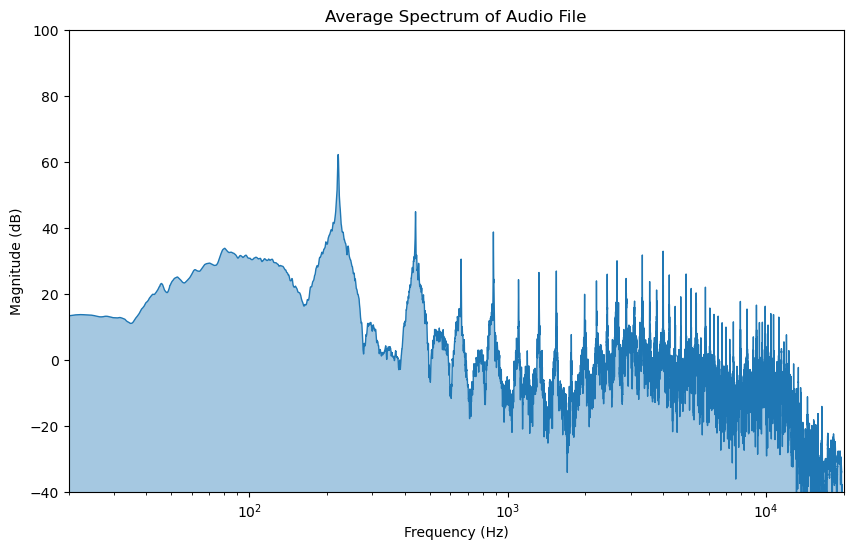

In [20]:
# Frequency Analysis
from scipy.signal import savgol_filter

magnitude_db = 20 * np.log10(magnitude)
log_magnitude = librosa.amplitude_to_db(magnitude)

magnitude_db = savgol_filter(magnitude_db, 31, 3)

plt.figure(figsize=(10, 6))
plt.plot(frequency, magnitude_db, '-', lw=1)
plt.title('Average Spectrum of Audio File')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xlim(20, 20000)  # Set the x-axis limits from 20 Hz to 20 kHz
plt.ylim(-40, 100)
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.fill_between(frequency, magnitude_db, step="pre", alpha=0.4)
plt.show()